# PrettyWebsite - A python package for websites' aesthetic analysis
This notebook is an example of how to use PrettyWebsite for simple aesthetic analysis of a website.
This tutorial have been tested using version 0.0.3 of the package.

In this notebook, the main features of the library are explained.

In [1]:
import os
import cv2
import prettywebsite
import matplotlib.pyplot as plt
import pkg_resources

print("PrettyWebsite:",prettywebsite.__version__)

PrettyWebsite: 0.0.3


First we import our three sample images. We load them as img1, img2 and img3.
we need to convert loaded image data from BGR (default in CV2) to RGB.

In [2]:
img1 = cv2.imread(pkg_resources.resource_filename('prettywebsite','../share/data/sample.png'))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(pkg_resources.resource_filename('prettywebsite','../share/data/sample2.png'))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread(pkg_resources.resource_filename('prettywebsite','../share/data/sample3.png'))
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img1_b = cv2.imread(pkg_resources.resource_filename('prettywebsite','../share/data/sample.png'),0)
img2_b = cv2.imread(pkg_resources.resource_filename('prettywebsite','../share/data/sample2.png'),0)
img3_b = cv2.imread(pkg_resources.resource_filename('prettywebsite','../share/data/sample3.png'),0)

([], <a list of 0 Text yticklabel objects>)

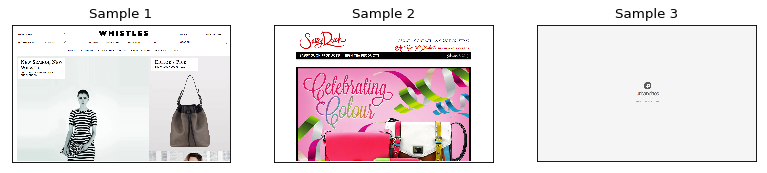

In [3]:
plt.figure("Images",figsize=(12, 6), dpi=80)
plt.subplot(1,3,1)
plt.title("Sample 1")
plt.imshow(img1)
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(1,3,2)
plt.title("Sample 2")
plt.imshow(img2)
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(1,3,3)
plt.title("Sample 3")
plt.imshow(img3)
plt.xticks([],[])
plt.yticks([],[])

## Visual Complexity
Visual complexity can be estimated using file weight or using more advance methods, such as QuadTree Decomposition. 

### Weight
Weight can be calculated using "os.stat(pathToImg).st_size"

In [4]:
VC_1_W =  os.stat(pkg_resources.resource_filename('prettywebsite','../share/data/sample.png')).st_size
VC_2_W =  os.stat(pkg_resources.resource_filename('prettywebsite','../share/data/sample2.png')).st_size
VC_3_W =  os.stat(pkg_resources.resource_filename('prettywebsite','../share/data/sample3.png')).st_size

### QuadTree Decomposition
We need to use the binary images.
VC is proportional to the number of rectangles obtained trhough QuadTree Decomposition

In [5]:
VC_1_QT = len(prettywebsite.quadTreeDecomposition.quadTree(img1_b,minStd=5,minSize=10).blocks)
VC_2_QT = len(prettywebsite.quadTreeDecomposition.quadTree(img2_b,minStd=5,minSize=10).blocks)
VC_3_QT = len(prettywebsite.quadTreeDecomposition.quadTree(img3_b,minStd=5,minSize=10).blocks)

### Weight vs QuadTree
We can visually inspect the relationship between weight and visual complexity by quadTree from our sample image

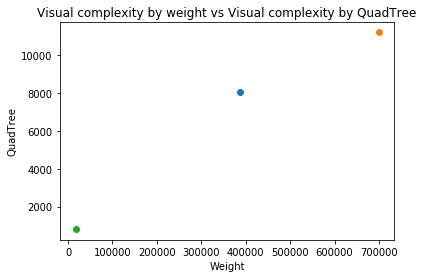

In [6]:
plt.figure("W vs QT")
plt.title("Visual complexity by weight vs Visual complexity by QuadTree")
plt.xlabel("Weight")
plt.ylabel("QuadTree")
plt.scatter(VC_1_W, VC_1_QT)
plt.scatter(VC_2_W, VC_2_QT)
plt.scatter(VC_3_W, VC_3_QT)
plt.show()

## Symmetry
In PrettyWebsite a way to estimate a degree of freedom (range 0-100) using QuadTree Decomposition is present. 
We expect img3 to be the more symmetric, and img2 to be more slightly symmetric than img1.

In [7]:
S_1 = prettywebsite.symmetry.getSymmetry(img1_b,5,20)
S_2 = prettywebsite.symmetry.getSymmetry(img2_b,5,20)
S_3 = prettywebsite.symmetry.getSymmetry(img3_b,5,20)

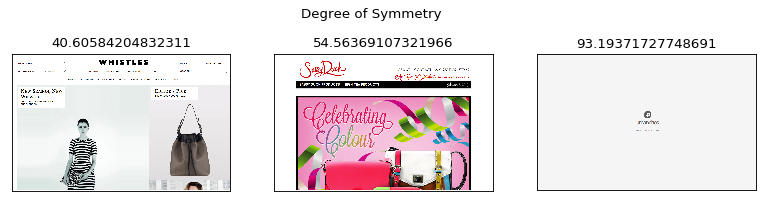

In [8]:
plt.figure("Symmetry",figsize=(12, 3), dpi=80)
plt.suptitle("Degree of Symmetry")
plt.subplot(1,3,1)
plt.title(S_1)
plt.imshow(img1)
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(1,3,2)
plt.title(S_2)
plt.imshow(img2)
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(1,3,3)
plt.title(S_3)
plt.imshow(img3)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

## Colorfulness
Colorfulness can be estimated by the Saturation (in the HRV color space) or from LinearRGB (in the RGB color Space).

In [9]:
C_1_S = prettywebsite.colorfulness.colorfulnessHSV(img1)
C_2_S = prettywebsite.colorfulness.colorfulnessHSV(img2)
C_3_S = prettywebsite.colorfulness.colorfulnessHSV(img3)

In [10]:
C_1_RGB = prettywebsite.colorfulness.colorfulnessRGB(img1)
C_2_RGB = prettywebsite.colorfulness.colorfulnessRGB(img2)
C_3_RGB = prettywebsite.colorfulness.colorfulnessRGB(img3)

Again, we can check the correlation between the two methods

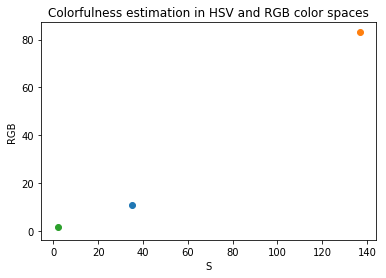

In [11]:
plt.figure("S vs RGB")
plt.title("Colorfulness estimation in HSV and RGB color spaces")
plt.xlabel("S")
plt.ylabel("RGB")
plt.scatter(C_1_S, C_1_RGB)
plt.scatter(C_2_S, C_2_RGB)
plt.scatter(C_3_S, C_3_RGB)
plt.show()

## Brightness
Brightness can be estimated from two different formulas, explained by BT.709 and BT.601.

Please not that the procedure is quite slow.
For faster results downsampling may be usefull.

In [12]:
B_1_709 = prettywebsite.brightness.relativeLuminance_BT709(img1)
B_2_709 = prettywebsite.brightness.relativeLuminance_BT709(img2)
B_3_709 = prettywebsite.brightness.relativeLuminance_BT709(img3)

In [13]:
B_1_601 = prettywebsite.brightness.relativeLuminance_BT709(img1)
B_2_601 = prettywebsite.brightness.relativeLuminance_BT709(img2)
B_3_601 = prettywebsite.brightness.relativeLuminance_BT709(img3)

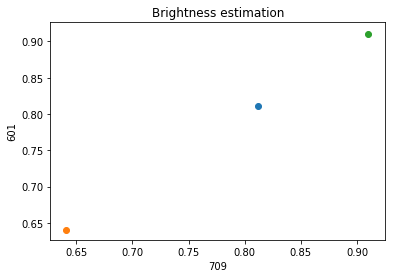

In [14]:
plt.figure("709 vs 601")
plt.title("Brightness estimation")
plt.xlabel("709")
plt.ylabel("601")
plt.scatter(B_1_709, B_1_601)
plt.scatter(B_2_709, B_2_601)
plt.scatter(B_3_709, B_3_601)
plt.show()

## Faces detection
Faces detection is possible thanks to OpenCV. 

In our pages, we expect the function to find a single face only in img1

In [15]:
print("In Img1 there is/are",len(prettywebsite.faceDetection.getFaces(img1)), "faces")
print("In Img2 there is/are",len(prettywebsite.faceDetection.getFaces(img2)), "faces")
print("In Img3 there is/are",len(prettywebsite.faceDetection.getFaces(img3)), "faces")

In Img1 there is/are 1 faces
In Img2 there is/are 0 faces
In Img3 there is/are 0 faces


## Colors estimation
With prettywebsite is possible to estimate the color distribution in an image, according to W3C sixteen basic colors.

This methods is unfortunately not the more suitable for recognition of colors in complex images such as modern websites, but can provide a general idea of the color pallette of a page.

Aqua is used for the 0.0 % of the image
Black is used for the 4.3 % of the image
Blue is used for the 0.0 % of the image
Fuchsia is used for the 0.0 % of the image
Gray is used for the 4.4 % of the image
Green is used for the 0.0 % of the image
Lime is used for the 0.0 % of the image
Maroon is used for the 0.3 % of the image
Navy is used for the 0.1 % of the image
Olive is used for the 0.4 % of the image
Purple is used for the 0.0 % of the image
Red is used for the 0.0 % of the image
Silver is used for the 5.3 % of the image
Teal is used for the 0.1 % of the image
White is used for the 85.0 % of the image
Yellow is used for the 0.0 % of the image


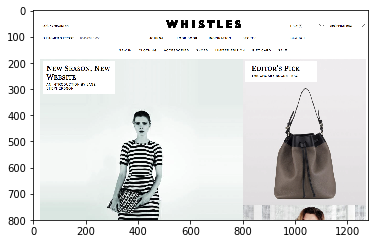

In [17]:
CS_1 = prettywebsite.colorDetection.getColorsW3C(img1,plot=True)
for color in CS_1:
    print(color[0],"is used for the",round(color[1],1),"% of the image")

Aqua is used for the 0.0 % of the image
Black is used for the 6.9 % of the image
Blue is used for the 0.0 % of the image
Fuchsia is used for the 0.0 % of the image
Gray is used for the 2.8 % of the image
Green is used for the 0.5 % of the image
Lime is used for the 0.0 % of the image
Maroon is used for the 0.9 % of the image
Navy is used for the 0.1 % of the image
Olive is used for the 2.7 % of the image
Purple is used for the 1.9 % of the image
Red is used for the 7.2 % of the image
Silver is used for the 30.2 % of the image
Teal is used for the 0.8 % of the image
White is used for the 45.4 % of the image
Yellow is used for the 0.6 % of the image


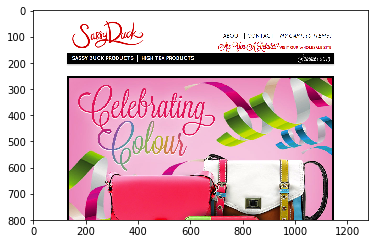

In [18]:
CS_2 = prettywebsite.colorDetection.getColorsW3C(img2,plot=True)
for color in CS_2:
    print(color[0],"is used for the",round(color[1],1),"% of the image")

Aqua is used for the 0.0 % of the image
Black is used for the 0.1 % of the image
Blue is used for the 0.0 % of the image
Fuchsia is used for the 0.0 % of the image
Gray is used for the 0.2 % of the image
Green is used for the 0.0 % of the image
Lime is used for the 0.0 % of the image
Maroon is used for the 0.0 % of the image
Navy is used for the 0.0 % of the image
Olive is used for the 0.0 % of the image
Purple is used for the 0.0 % of the image
Red is used for the 0.0 % of the image
Silver is used for the 0.1 % of the image
Teal is used for the 0.0 % of the image
White is used for the 99.6 % of the image
Yellow is used for the 0.0 % of the image


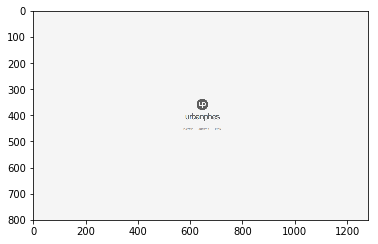

In [19]:
CS_3 = prettywebsite.colorDetection.getColorsW3C(img3,plot=True)
for color in CS_3:
    print(color[0],"is used for the",round(color[1],1),"% of the image")